In [1]:
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

2021-10-12 18:13:50.178474: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-12 18:13:50.178530: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
path = "/home/yogesh/Desktop/CS/cbirVGG/dataset/flower_images/gray_flower"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            flowers.append(file.name)
       

In [3]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    
    return features

2021-10-12 18:13:55.044960: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-12 18:13:55.045197: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (yogesh-HP-Pavilion-Sleekbook-15-PC): /proc/driver/nvidia/version does not exist
2021-10-12 18:13:55.949984: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 411041792 exceeds 10% of free system memory.
2021-10-12 18:13:56.642322: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 411041792 exceeds 10% of free system memory.
2021-10-12 18:13:56.843148: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 411041792 exceeds 10% of free system memory.
2021-10-12 18:13:57.175910: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 67108864 exceeds 10% of free system memory.
2021-10-12 18:13:57.275023: W tensorflow/core/fram

In [4]:
print(flowers[:10])

['0182.png', '0104.png', '0181.png', '0094.png', '0023.png', '0172.png', '0164.png', '0049.png', '0065.png', '0165.png']


In [5]:
data = {}
p = "/home/yogesh/Desktop/CS/cbirVGG/dataset/flower_images/flower_images/flower_features.pkl"

# lop through each image in the dataset
for flower in flowers:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(flower,model)
        data[flower] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)
          
 
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
# feat.shape
# (210, 1, 4096)

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape
# (210, 4096)

#get the unique labels (from the flower_labels.csv)
df = pd.read_csv('/home/yogesh/Desktop/CS/cbirVGG/dataset/flower_images/flower_images/flower_labels.csv')
label = df['label'].tolist()
unique_labels = list(set(label))

2021-10-12 18:14:09.039052: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [105]:
pca = PCA(n_components=100, random_state=22)
print(feat.shape)
pca.fit(feat)
x = pca.transform(feat)

(210, 4096)


In [82]:
print(len(x[209]))

100


In [7]:
feat.shape
(210, 4096)print("Components before PCA: {f.shape[1]}")
print("Components after PCA: {pca.n_components}")

Components before PCA: {f.shape[1]}
Components after PCA: {pca.n_components}


In [147]:
kmeans = KMeans(n_clusters=len(unique_labels), random_state=22)
print(feat.shape)
kmeans.fit(feat)

(210, 4096)


KMeans(n_clusters=10, random_state=22)

In [148]:
kmeans.labels_

array([3, 9, 9, 5, 9, 4, 5, 7, 3, 4, 4, 1, 0, 4, 9, 3, 2, 2, 3, 1, 2, 5,
       8, 9, 0, 2, 6, 0, 9, 7, 3, 2, 3, 4, 3, 8, 4, 3, 8, 7, 4, 9, 7, 3,
       3, 5, 7, 7, 4, 0, 4, 7, 5, 4, 9, 9, 5, 1, 3, 3, 5, 4, 8, 6, 3, 3,
       4, 2, 5, 8, 6, 2, 3, 7, 8, 1, 5, 5, 5, 2, 8, 9, 0, 2, 0, 8, 3, 6,
       1, 9, 5, 7, 5, 4, 7, 9, 5, 3, 4, 7, 2, 3, 7, 5, 2, 2, 9, 5, 8, 4,
       6, 9, 6, 9, 9, 2, 5, 3, 2, 0, 4, 0, 5, 8, 4, 8, 2, 3, 3, 3, 6, 3,
       4, 6, 4, 4, 3, 9, 5, 3, 8, 7, 8, 9, 3, 8, 7, 8, 4, 0, 7, 9, 7, 2,
       5, 5, 8, 3, 3, 4, 8, 5, 7, 7, 7, 1, 7, 5, 3, 2, 2, 5, 8, 5, 3, 2,
       6, 7, 5, 5, 5, 1, 0, 8, 0, 0, 2, 7, 9, 4, 5, 9, 1, 5, 8, 9, 2, 9,
       3, 6, 8, 4, 3, 4, 5, 0, 8, 0, 5, 1], dtype=int32)

In [149]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)


In [150]:
groups[0]

['0036.png',
 '0058.png',
 '0009.png',
 '0188.png',
 '0055.png',
 '0195.png',
 '0060.png',
 '0117.png',
 '0163.png',
 '0042.png',
 '0203.png',
 '0128.png',
 '0136.png',
 '0210.png']

In [151]:
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

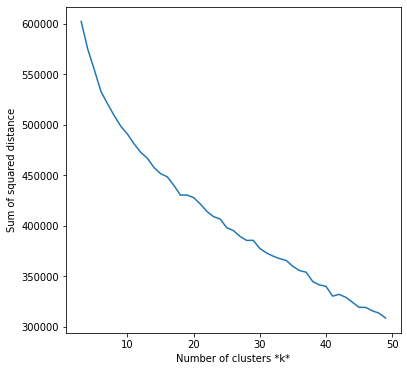

In [152]:
sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
    
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

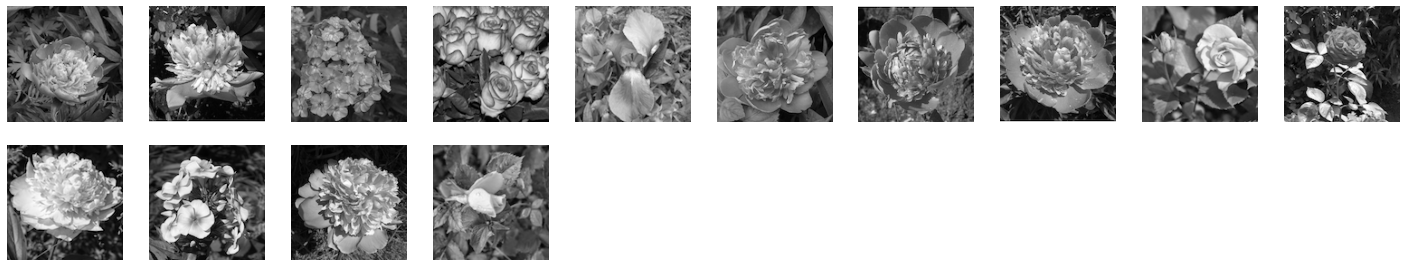

In [154]:
view_cluster(0)

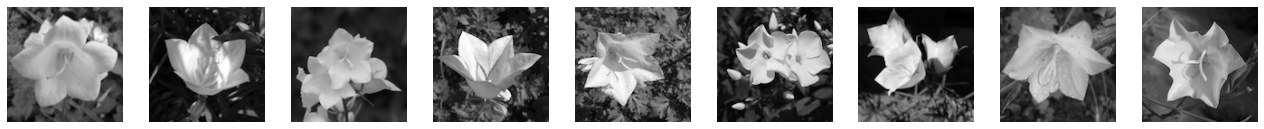

In [155]:
view_cluster(1)

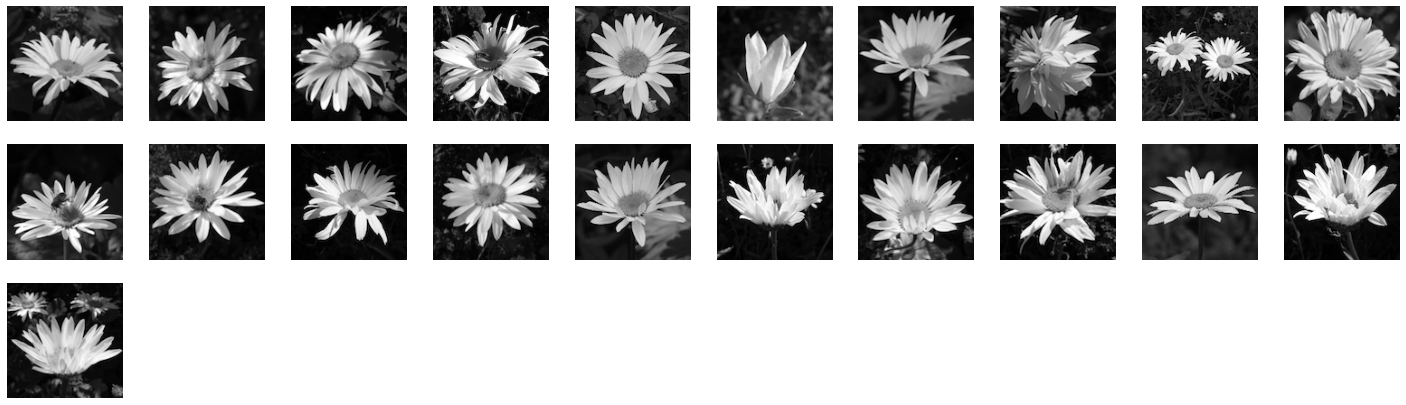

In [156]:
view_cluster(2)

Clipping cluster size from 32 to 30


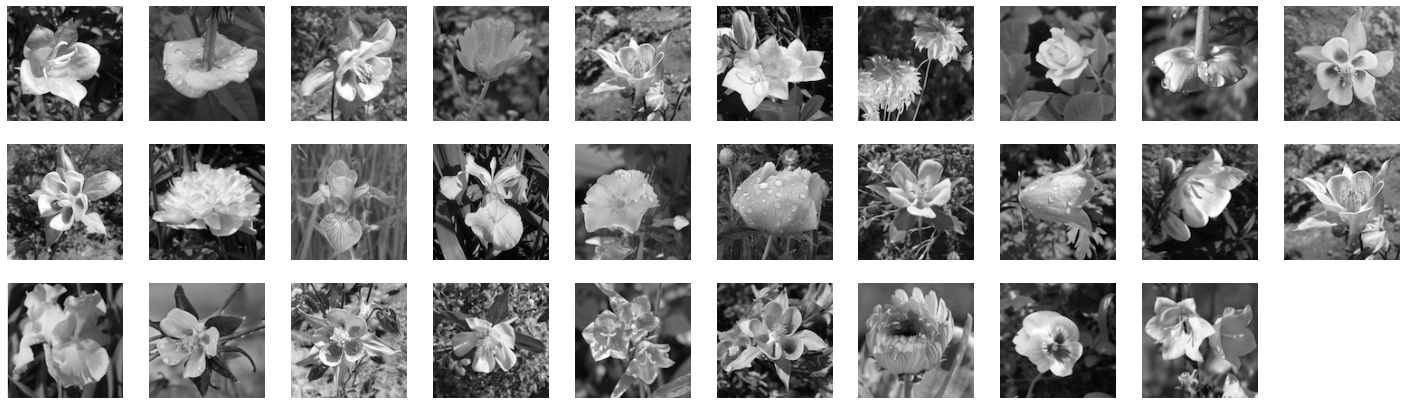

In [157]:
view_cluster(3)

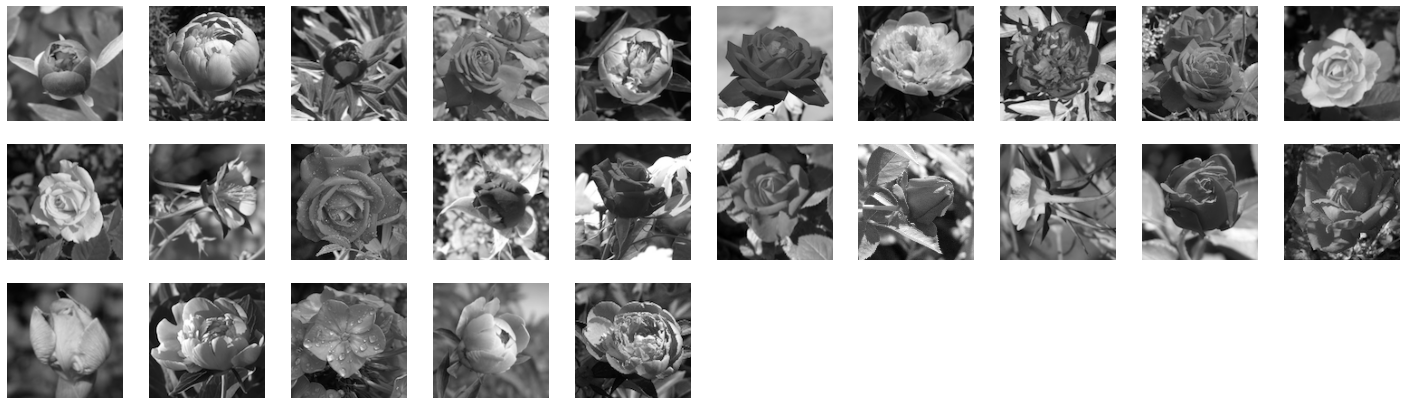

In [158]:
view_cluster(4)

Clipping cluster size from 32 to 30


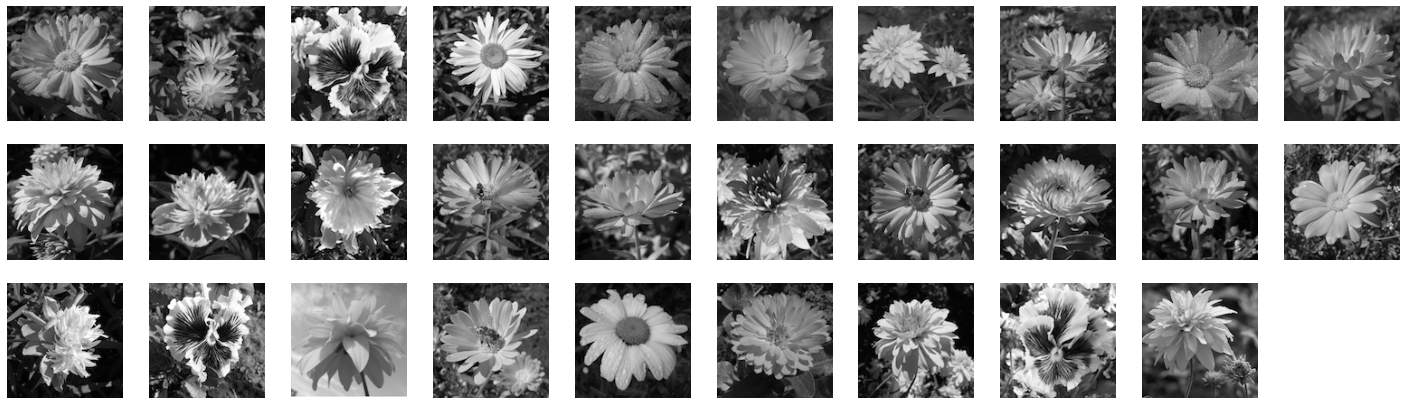

In [159]:
view_cluster(5)

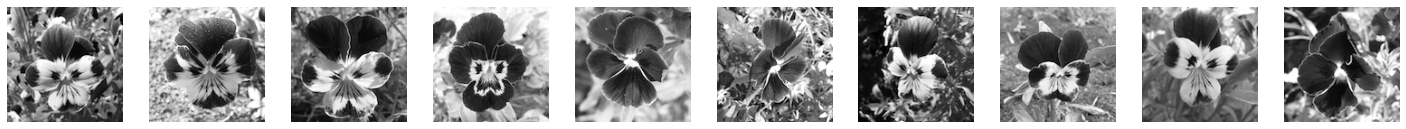

In [160]:
view_cluster(6)

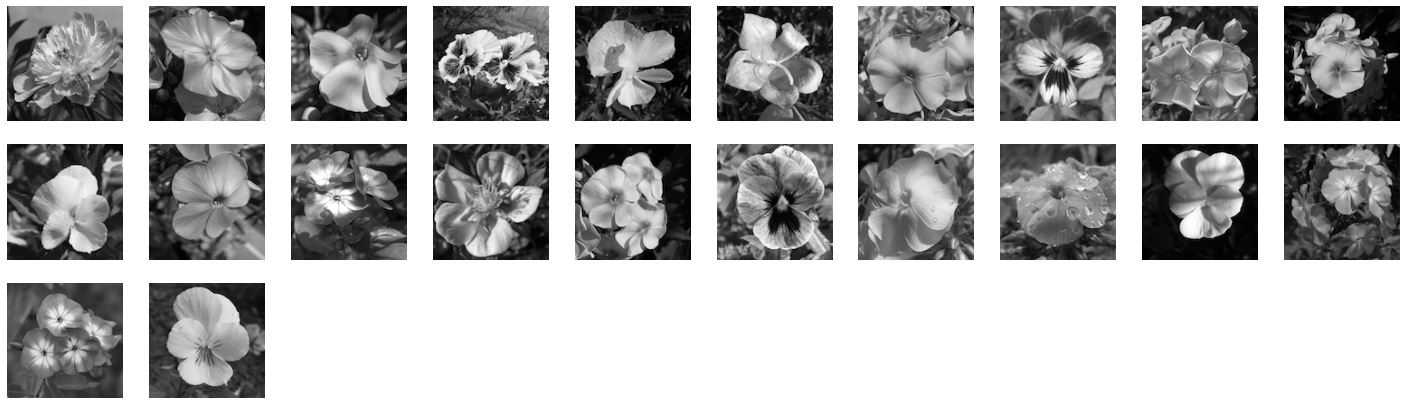

In [161]:
view_cluster(7)

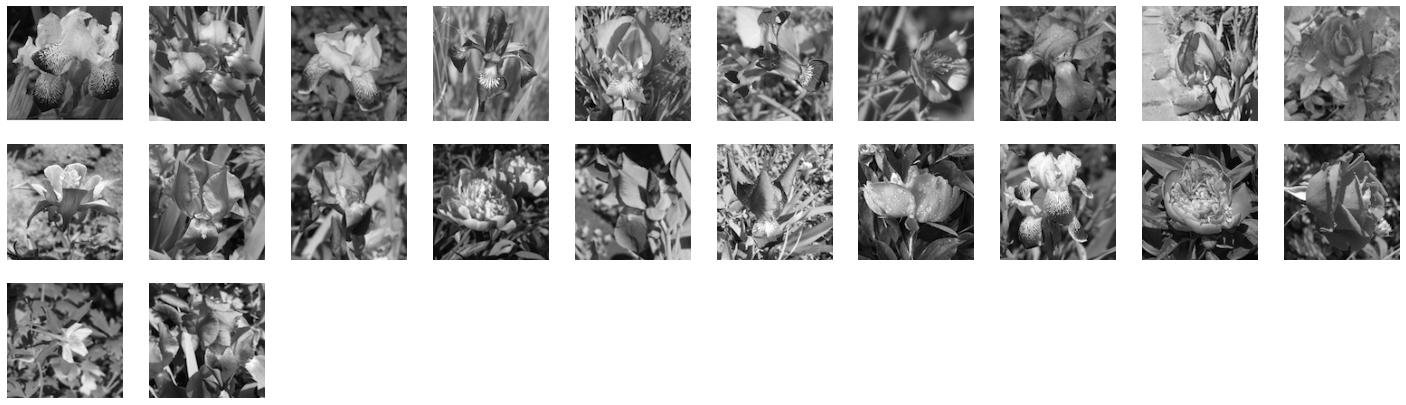

In [162]:
view_cluster(8)

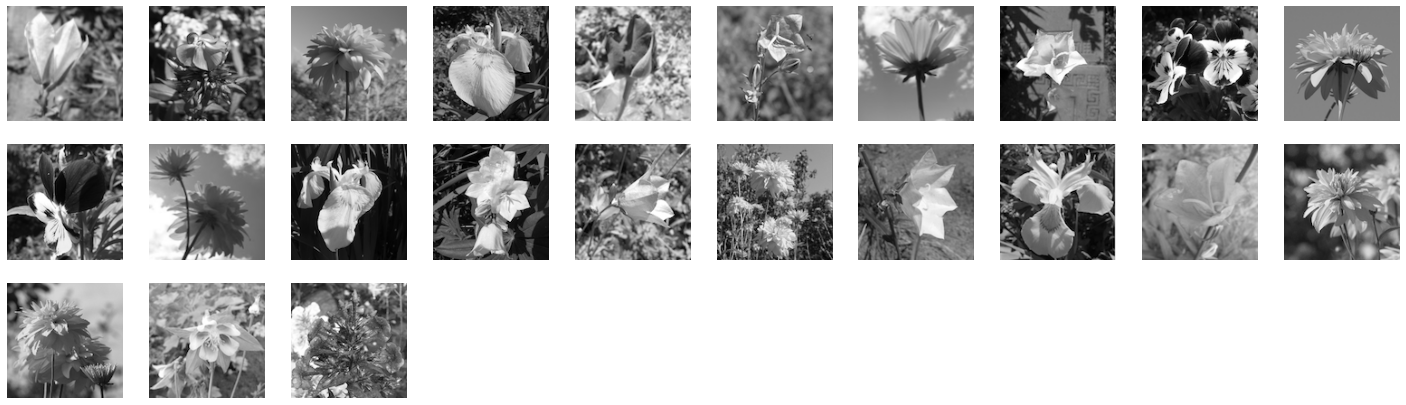

In [163]:
view_cluster(9)

In [170]:
import cv2 
data1 = {}
img = cv2.imread("1.jpg")
def output_predict(img):
    feat1 = extract_features("/home/yogesh/Desktop/CS/cbirVGG/dataset/flower_images/gray_flower/0077.png",model)
    print(feat1.shape)
    dpca = PCA(n_components=1, random_state=22)
#     pca.fit(feat1)
#     x1 = pca.transform(feat1)
#     print(x1)ata1[img] = feat1
    # get a list of the filenames
    filenames = np.array(list(data1.keys()))

    # get a list of just the features
    feat1 = np.array(feat1)
    print(feat1.shape) 
    
    print(feat1)
#     pca2 = PCA(n_components=100, random_state=22)
#     print("pca")    
    
#     pca2.fit(feat1)
#     x1 = pca2.transform(feat1)
    xtemp= np.array(feat1[0])
    print(len(xtemp))
    xtemp = xtemp[300:400]
    x1 = [xtemp]
    x1=np.array(x1)
    print(x1)
    a = kmeans.predict(feat1)
    print("cluster")
    return a
    
      
    
    

In [171]:

print(output_predict(img))

(1, 4096)
(1, 4096)
[[0.         3.897504   0.7744883  ... 7.5485153  0.29613307 0.        ]]
4096
[[0.         5.433169   1.3788631  0.         0.         0.
  0.         0.         0.         0.         0.2432093  0.
  0.         0.         0.         0.8228487  0.         0.
  0.         1.1445057  0.         1.6478398  0.         0.
  0.         0.         0.         0.         0.26918626 0.
  0.         0.         0.         0.         1.9298058  0.
  2.8384326  0.         0.         0.         0.         0.
  0.69338256 0.         0.         0.         0.         1.6658571
  0.         1.6079438  0.         0.         0.         0.23990908
  1.1994483  0.         0.         1.3535991  0.         5.3849025
  2.9687974  1.3580561  0.         0.         0.         0.
  0.         0.47178566 0.         3.6058748  0.         0.
  0.31263754 0.         0.         0.         0.         0.
  0.09698972 0.         0.         0.         3.3707743  0.
  0.         0.         1.9324417  0.  